In [2]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer

Loading datset

In [4]:
data = pd.read_csv("synthetic_text_data.csv")
data.head()

,text,label
0,Artificial intelligence is advancing in health...,Technology
1,Football fans are excited about the upcoming W...,Sports
2,New policies regarding climate change have spa...,Politics
3,The latest blockbuster movie has shattered box...,Entertainment
4,Quantum computing promises to revolutionize in...,Technology


In [5]:
X = data['text']
Y = data['label']

Splitting the data

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

 Text Preprocessing: Converting Text to Numeric Features


In [9]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


Training the navie bayes classifier

In [10]:
model = MultinomialNB()
model.fit(X_train_vec, Y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


MAking predictions

In [11]:
Y_pred = model.predict(X_test_vec)

Evaluating the Model

Accuracy: 88.23529411764706%


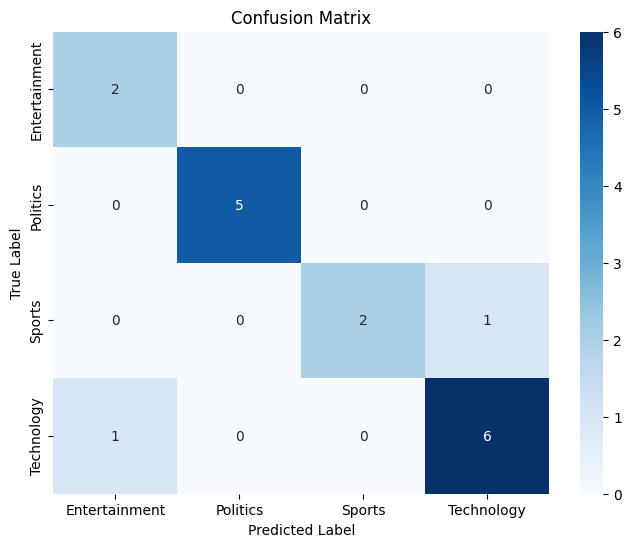

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
accuracy = accuracy_score(Y_test , Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
print(f"Accuracy: {accuracy *100}%")

class_labels = np.unique(Y_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Looking at the confusion matrix heatmap we can see the model made correct predictions for Sports (2), Technology (5), Politics (2) and Entertainment (6). Heatmap shows these values with darker colors representing correct predictions. However there were some misclassifications.



Prediction on Unseen Data

In [14]:
user_input = ["I love learning about artificial intelligence and machine learning"]
user_input_vec = vectorizer.transform(user_input)
user_pred = model.predict(user_input_vec)
print(f"Predicted label for user input '{user_pred[0]}',category.")

Predicted label for user input 'Technology',category.
